In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_hedi = False
import numpy as np
import pandas as pd

데이터 분석을 위해서 데이터를 불러온다. => 불러온 데이터를 데이터 집합(set)이라고 한다.

In [2]:
# read_csv() 메소드는 데이터 집합을 불러와서 데이터프레임으로 리턴한다.
# read_csv() 메소드는 ','로 구분된 데이터를 불러오기 때문에 탭으로 구분된 갭마인더 데이터는 구분자를 지정하는 sep 옵션에 '\t'를 지정해서 불러온다.
gapminder_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(type(gapminder_df))
gapminder_df

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
# head() 메소드는 데이터프레임 앞쪽 데이터를 지정한 인수개만큼 출력한다. 기본값은 5
gapminder_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [4]:
# tail() 메소드는 데이터프레임 뒤쪽 데이터를 지정한 인수개만큼 출력한다. 기본값은 5
gapminder_df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [5]:
# shape 속성은 데이터프레임에 저장된 데이터에 행과 열의 크기 정보를 저장하고 있다.
print(gapminder_df.shape)
print(gapminder_df.shape[0]) # shape[0]은 데이터프레임의 행의 개수
print(gapminder_df.shape[1]) # shape[1]은 데이터프레임의 열의 개수

(1704, 6)
1704
6


In [6]:
# columns 속성은 데이터프레임의 열 이름을 저장하고 있다.
print(gapminder_df.columns)
# 국가: country, 대륙: continent, 연도: year, 평균수명: lifeExp, 인구수: pop, 1인당: gdp

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [7]:
# dtype 속성은 데이터프레임을 구성하고 있는 데이터의 자료형을 확인할 수 있다. object => 문자열
print(gapminder_df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [8]:
# info() 메소드를 사용하면 dtypes 속성을 사용한 것 보다 조금 더 자세한 내용을 확인할 수 있다.
print(gapminder_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위 데이터 추출하기

In [9]:
# 1개의 열만 추출하면 시리즈를 얻을 수 있다.
# 1. 데이터프레임에서 열 단위 데이터를 추출하려면 대괄호에 열 이름을 지정하면 된다.
#country = gapminder_df['country'] # 데이터프레임에서 1개의 열만 얻어오려면 열 이름만 사용하면 된다.

# 2. 데이터프레임에서 열 단위 데이터를 추출하려면 get() 메소드의 인수로 열 이름을 지정하면 된다.
#country = gapminder_df.get('country') 

# 3. 1개의 열만 얻어와야 할 경우 데이터 프레임 이름 뒤에 '.'을 찍고 열 이름을 적어주면 된다.
country = gapminder_df.country
print(type(country))
country

<class 'pandas.core.series.Series'>


0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [10]:
# 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있다.
# 데이터프레임에서 1개의 열만 얻어오려면 []안에 또는 get() 메소드의 인수로 열 이름만 지정하면 되지만, 2개 이상의 열을 얻어오려면 [] 또는 
# get() 메소드의 인수로 반드시 리스트 형태로 열 이름을 지정해야 한다.
#subset_df = gapminder_df[['country', 'continent', 'year']]
#subset_df = gapminder_df[['lifeExp', 'pop', 'gdpPercap']]
subset_df = gapminder_df[['lifeExp', 'pop', 'gdpPercap']]
print(type(subset_df))
print(subset_df)

<class 'pandas.core.frame.DataFrame'>
      lifeExp       pop   gdpPercap
0      28.801   8425333  779.445314
1      30.332   9240934  820.853030
2      31.997  10267083  853.100710
3      34.020  11537966  836.197138
4      36.088  13079460  739.981106
...       ...       ...         ...
1699   62.351   9216418  706.157306
1700   60.377  10704340  693.420786
1701   46.809  11404948  792.449960
1702   39.989  11926563  672.038623
1703   43.487  12311143  469.709298

[1704 rows x 3 columns]


행 단위 데이터 추출하기

loc는 인덱스를 기준으로 행 단위 데이터를 추출하고, iloc는 행 번호를 기준으로 행 단위 데이터를 추출한다.

In [11]:
gapminder_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


loc를 사용하면 0 ~ 1703 사이의 값을 이용해서 행 단위 데이터를 추출할 수 있고,   
인덱스가 아닌 -1이나 1704와 같이 인덱스 범위를 벗어나는 인덱스를 지정하면 에러가 발생된다.

In [14]:
print(gapminder_df.loc[0])
print('=' * 80)
print(gapminder_df.loc[1703])
print('=' * 80)
# print(gapminder_df.loc[-1]) # key 에러

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [17]:
# 마지막 데이터 추출하기
print(len(gapminder_df))
print(gapminder_df.loc[len(gapminder_df) - 1])

1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [20]:
# 마지막 데이터 추출하기 => shape 속성 사용
print(gapminder_df.shape)
print(gapminder_df.loc[gapminder_df.shape[0] - 1])

(1704, 6)
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [22]:
# 마지막 데이터 추출하기 => tail() 메소드 사용
print(gapminder_df.tail(1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [24]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.loc[[0, 9, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
9     Afghanistan      Asia  1997   41.763  22227415   635.341351
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


In [26]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위 데이터를 추출할 수 있고, 1704와 같이 범위를 벗어나는 행 번호를 사용하면 에러가 발생된다.
# 음수를 지정하면 뒤부터 역순으로 행 단위 데이터를 추출할 수 있다.
print(gapminder_df.iloc[0])
print('=' * 80)
print(gapminder_df.iloc[1703])
print('=' * 80)
print(gapminder_df.iloc[-1]) # 음수 인덱싱 사용가능

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [27]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 행 번호를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.loc[[0, 9, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
9     Afghanistan      Asia  1997   41.763  22227415   635.341351
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.  
데이터프레임.loc[[행], [열]], 데이터프레임.iloc[[행], [열]] 방법을 사용해야 하며 슬라이싱이나 range() 함수를 사용하는 방법을 알아야 한다.

슬라이싱

In [31]:
# 모든 행(':')의 데이터에 대해 county, year, pop 열을 추출한다.
subset = gapminder_df.loc[:, ['country', 'year', 'pop']]
subset.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [ ]:
# loc는 열을 추출할 때 열 이름에 정수 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.loc[:, [0, 2, 4]] # 에러

In [32]:
subset = gapminder_df.iloc[:, [0, 2, 4]]
subset.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


In [34]:
# iloc는 열을 추출할 때 열 이름에 문자열 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.iloc[:, ['country', 'year', 'pop']] # 에러

range() 함수보다 슬라이싱을 사용하면 더 간편하게 사용할 수 있다.

In [35]:
# subset = gapminder_df.iloc[:, range(3, 6)]
subset = gapminder_df.iloc[:, 3:]
subset.head(3)

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710


In [36]:
# subset = gapminder_df.iloc[:, range(0, 6, 2)]
# [시작:끝], [시작:끝:증가]
subset = gapminder_df.iloc[:, ::2]
subset.head(3)

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


iloc로 열 리스트를 정수로 전달하는 방법이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한 코드인지 파악하지 못할 수 있다.  
그래서 일반적으로 loc로 열 리스트를 전달하는 방법을 많이 사용한다.

In [38]:
gapminder_df.iloc[:, [0, 3, 5]].head(3)

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710


In [39]:
gapminder_df.loc[:, ['country', 'lifeExp', 'gdpPercap']].head(3)

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710


기초 통계 계산하기

In [43]:
# groupby() 메소드 사용해서 year 열로 그룹화하고 평균 수명 열(lifeExp)만 추출해서 평균(mead())을 계산한다.
print(gapminder_df.groupby('year'))
print(gapminder_df.groupby('year')['lifeExp']) # 그룹화된 데이터프레임에서 시리즈 추출
print(gapminder_df.groupby('year')['lifeExp'].mean()) 

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [48]:
import matplotlib.pyplot as plt

In [46]:
global_yearly_life = gapminder_df.groupby('year')['lifeExp'].mean()
global_yearly_life

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

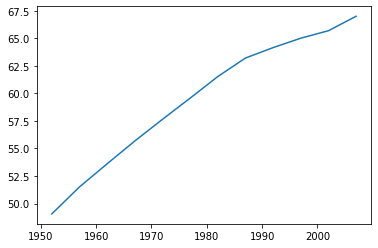

In [49]:
plt.plot(global_yearly_life)
plt.show()